In [90]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


> This Code creates DataFrame with the columns:
- classfication (name of the image folder)
- image_path

In [102]:

# Path to the dataset directory
dataset_dir = 'data/PlantVillage/'

# Function to load images and labels using OpenCV
def load_dataset(dataset_path):
    data_dict = {}
    # Walk through the dataset directory
    for root, dirs, files in os.walk(dataset_path):
        for dir_name in dirs:
            # Initialize an empty list for each subfolder
            data_dict[dir_name] = []

            # Get the full path to the subfolder
            subfolder_path = os.path.join(root, dir_name)

            # Iterate through the files in the subfolder
            for file in os.listdir(subfolder_path):
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    # Construct the full path to the image
                    image_path = os.path.join(subfolder_path, file)

                    # Load the image using OpenCV
                    image = cv2.imread(image_path)
                    # Convert from BGR to RGB color space
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                    # Append the image to the list associated with the subfolder name
                    data_dict[dir_name].append(image)
    data = [(classification, path) for classification, paths in data_dict.items() for path in paths]
    df = pd.DataFrame(data, columns=['classification', 'image'])
    return df

# Load your dataset
df = load_dataset(dataset_dir)


> Lets keep the tomatos images only

In [105]:
for label in df.classification.unique():
    if 'tomato' in label.lower():
        print(label)

Tomato_healthy
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Early_blight
Tomato__Target_Spot
Tomato_Leaf_Mold
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_Septoria_leaf_spot
Tomato__Tomato_mosaic_virus
Tomato_Bacterial_spot
Tomato_Late_blight


In [106]:
tomato_data = df.loc[df['classification'].str.contains('Tomato')]
tomato_data.shape

(16011, 2)

> Sample from each classification 

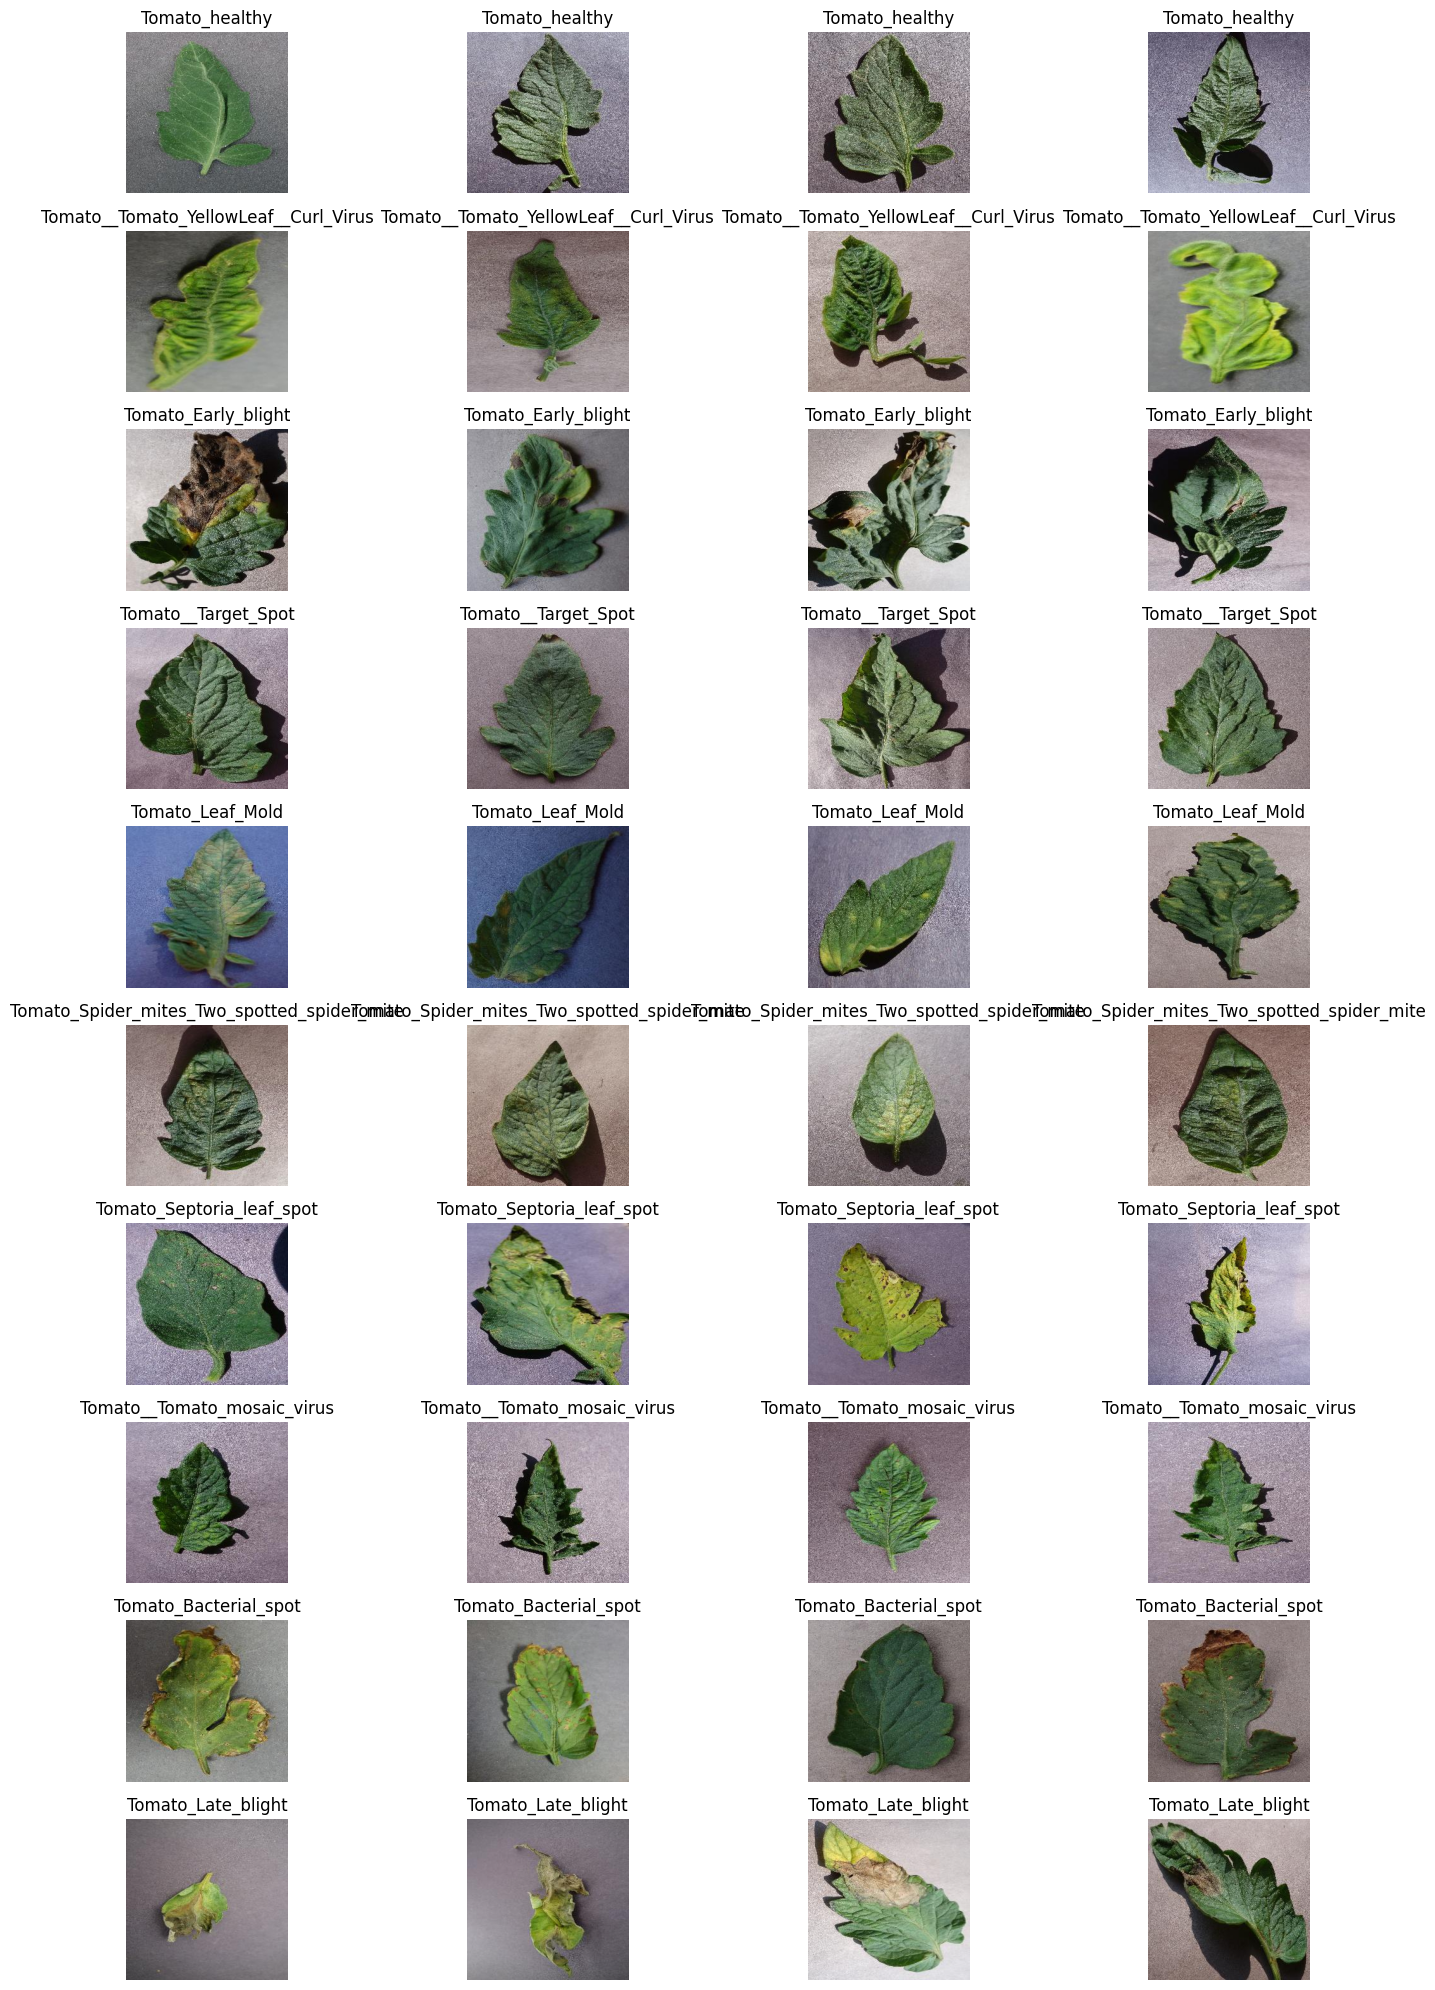

In [107]:
num_images_per_class = 4
images_to_display = []
titles = []
for label in tomato_data.classification.unique():
    label_sample = tomato_data.loc[tomato_data.classification == label].sample(num_images_per_class).image.to_list()
    images_to_display += label_sample
    titles += [label]*num_images_per_class



fig, axes = plt.subplots(nrows=len(tomato_data.classification.unique()), ncols=num_images_per_class, figsize=(15, 20))  
for ax, image, title in zip(axes.flatten(), images_to_display, titles):
    ax.imshow(image)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

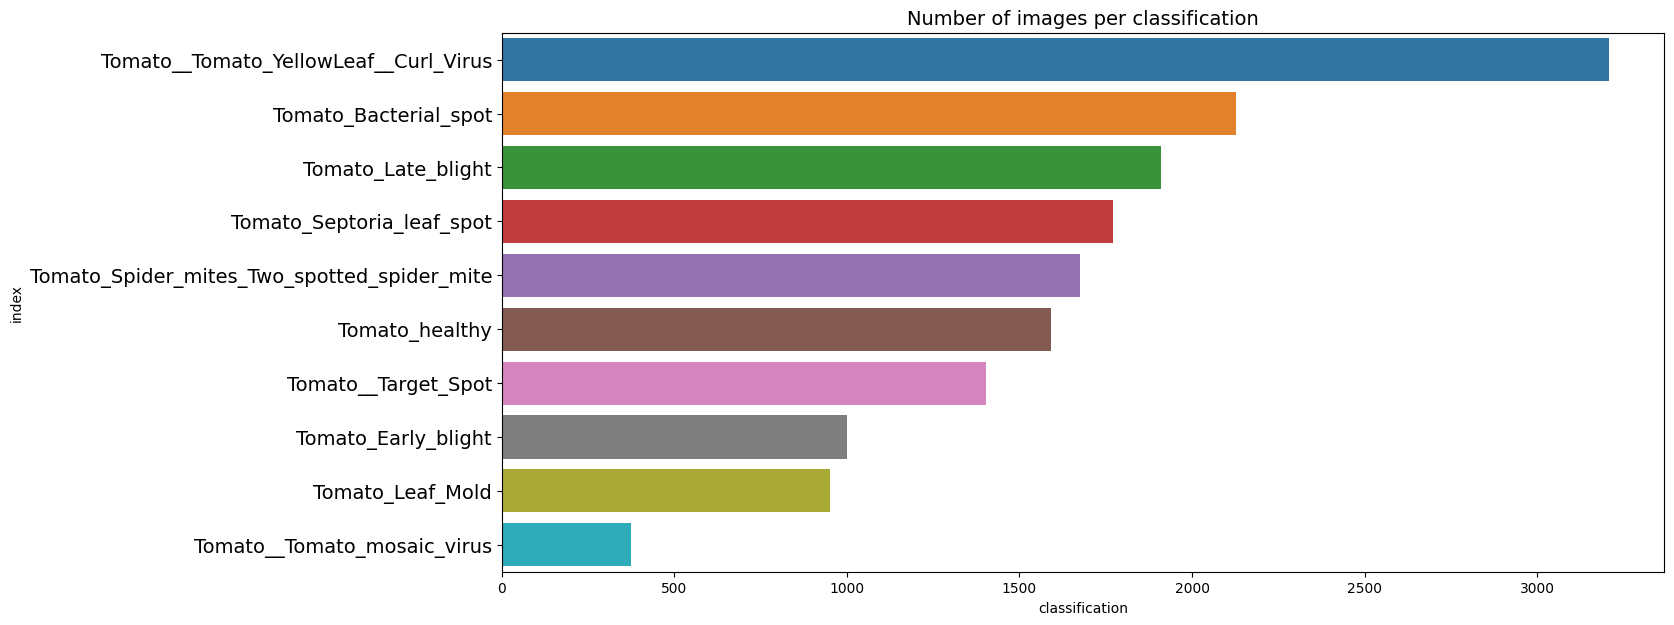

In [108]:
ax, fig = plt.subplots(figsize=(15,7))
sns.barplot(tomato_data.classification.value_counts().reset_index(), y='index', x='classification')
plt.yticks(fontsize=14)
plt.title("Number of images per classification", fontsize=14)
plt.show()

> Check weather the images resolution are unique

In [110]:
tomato_data['image_shape'] = tomato_data.image.apply(lambda x: x.shape)

print(f"The image resolution we have in the dataset are : {tomato_data.image_shape.unique()}")

The image resolution we have in the dataset are : [(256, 256, 3)]
